<a href="https://colab.research.google.com/github/remendec/Challenge-TelecomX/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 📌 Extracción

In [5]:
# Extracción de datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
print("Datos cargados exitosamente:")
print(df.head())
print("\nInformación del DataFrame:")
print(df.info())

Datos cargados exitosamente:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber opt

## 🔧 Transformación

In [8]:
# Transformación de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos (si no lo has hecho en la etapa de Extracción)
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

# Revisar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Desanidar las columnas anidadas
# Extraer subcampos de 'customer', 'phone', 'internet', y 'account'
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Combinar los datos desanidados con las columnas originales
df = df[['customerID', 'Churn']].join([df_customer, df_phone, df_internet, df_account])

# Revisar las columnas resultantes
print("\nColumnas después de desanidar:")
print(df.columns)

# Manejo de valores nulos
# Imputar valores nulos en Charges.Total (si tenure es 0, Charges.Total = 0)
df['Charges.Total'] = df['Charges.Total'].fillna(0)

# Convertir columnas a tipos de datos adecuados
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Verificar duplicados
print("\nNúmero de filas duplicadas:", df.duplicated().sum())
df = df.drop_duplicates()

# Convertir 'Churn' a binario (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Revisar valores únicos en columnas categóricas
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                      'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                      'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_columns:
    if col in df.columns:
        print(f"\nValores únicos en {col}:", df[col].unique())

# Guardar el DataFrame limpio
df_clean = df.copy()
print("\nDatos después de la transformación:")
print(df_clean.head())


Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Columnas después de desanidar:
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

Número de filas duplicadas: 0

Valores únicos en gender: ['Female' 'Male']

Valores únicos en SeniorCitizen: [0 1]

Valores únicos en Partner: ['Yes' 'No']

Valores únicos en Dependents: ['Yes' 'No']

Valores únicos en PhoneService: ['Yes' 'No']

Valores únicos en MultipleLines: ['No' 'Yes' 'No phone service']

Valores únicos en InternetService: ['DSL' 'Fiber optic' 'No']

Valores únicos en OnlineSecurity: ['No' 'Yes' 'No internet servi

## 📊 Carga y análisis

In [9]:
# Carga de datos
df_clean.to_csv('TelecomX_Data_clean.csv', index=False)
print("Datos limpios guardados en 'TelecomX_Data_clean.csv'")

Datos limpios guardados en 'TelecomX_Data_clean.csv'



Estadísticas descriptivas:
        customerID        Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7043.000000   7267    7267.000000    7267       7267   
unique        7267          NaN      2            NaN       2          2   
top     9995-HOTOH          NaN   Male            NaN      No         No   
freq             1          NaN   3675            NaN    3749       5086   
mean           NaN     0.265370    NaN       0.162653     NaN        NaN   
std            NaN     0.441561    NaN       0.369074     NaN        NaN   
min            NaN     0.000000    NaN       0.000000     NaN        NaN   
25%            NaN     0.000000    NaN       0.000000     NaN        NaN   
50%            NaN     0.000000    NaN       0.000000     NaN        NaN   
75%            NaN     1.000000    NaN       0.000000     NaN        NaN   
max            NaN     1.000000    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetServ

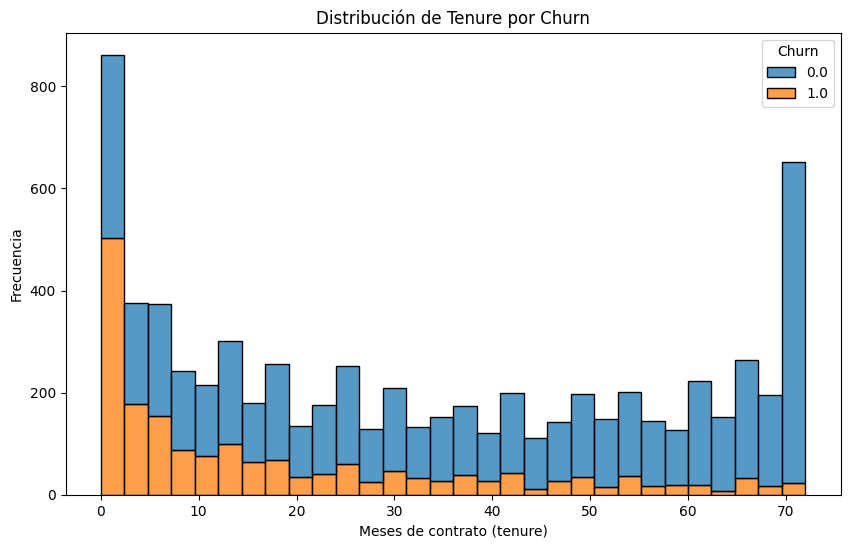

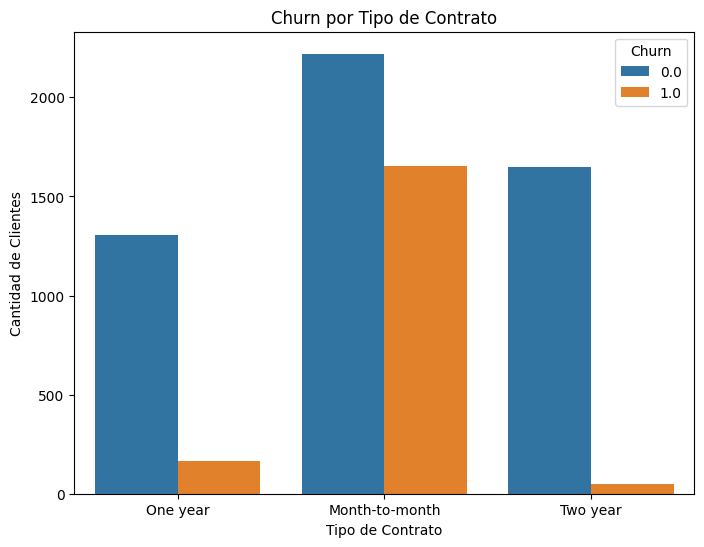

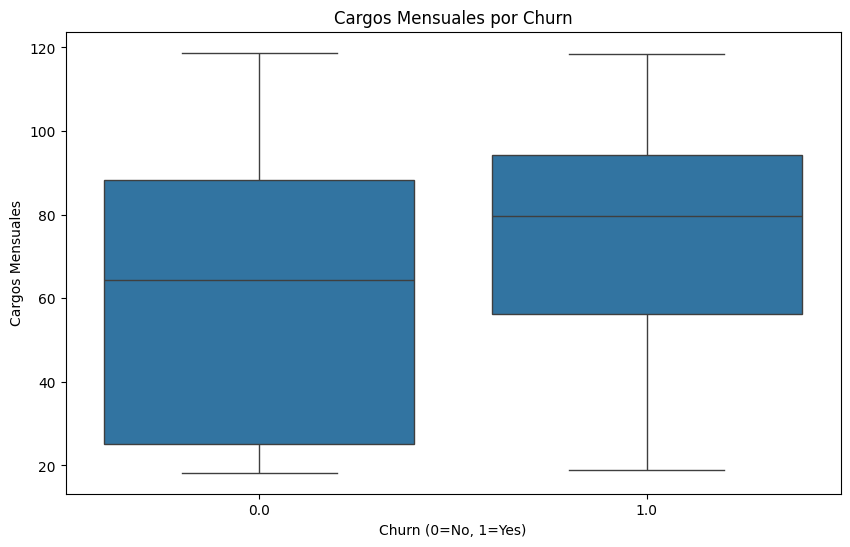

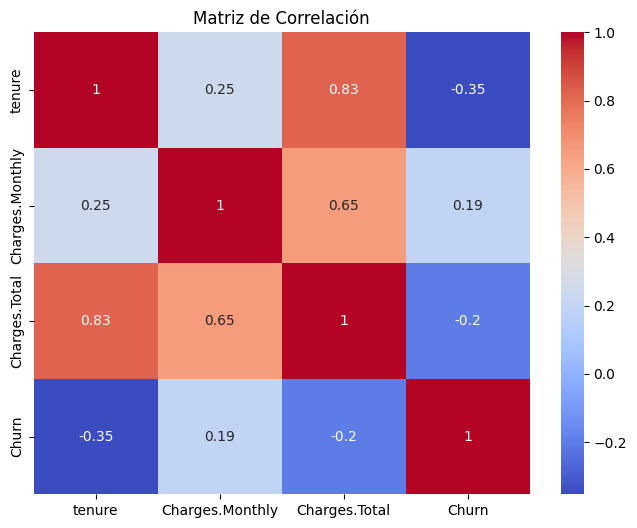

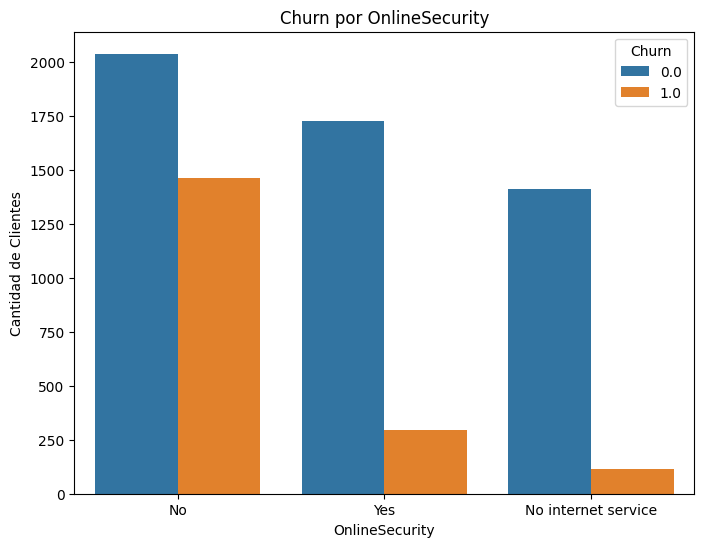

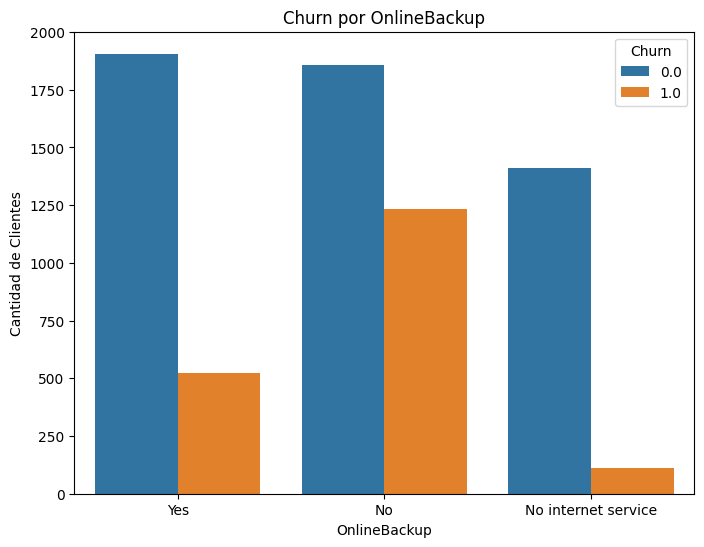

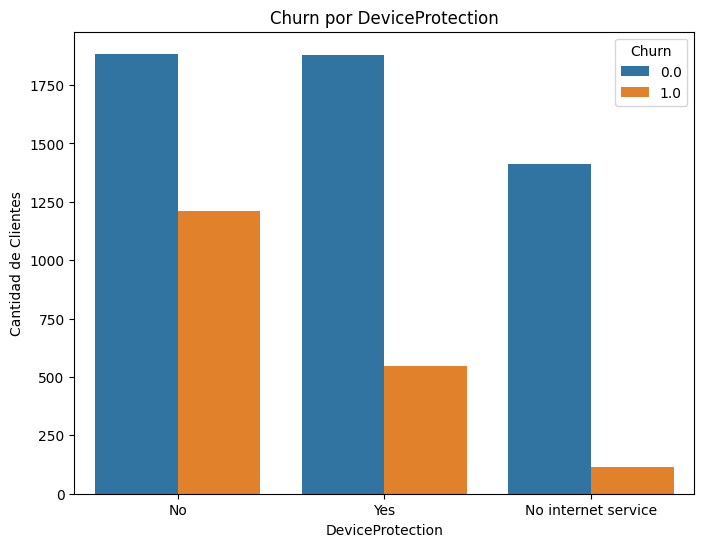

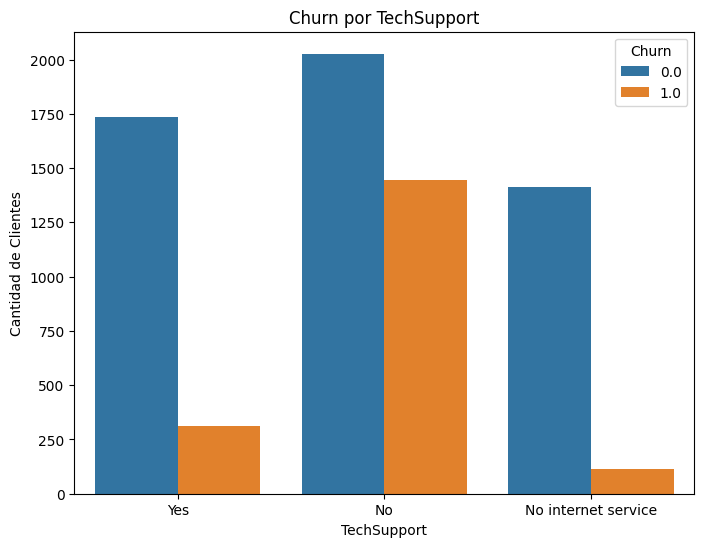

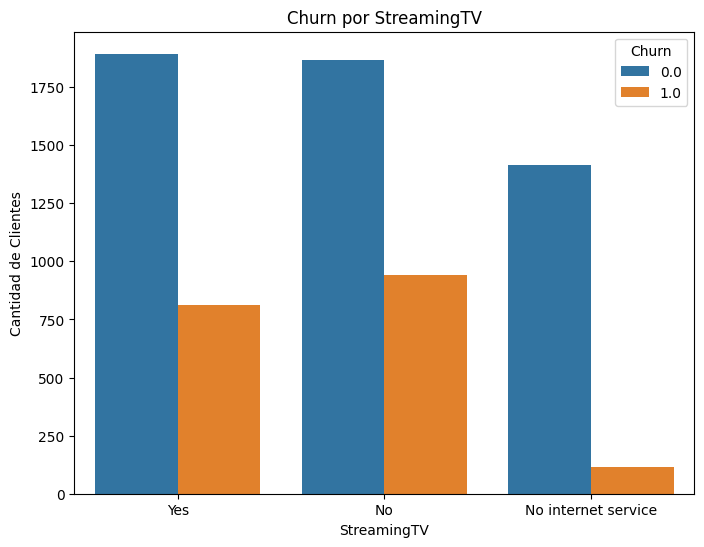

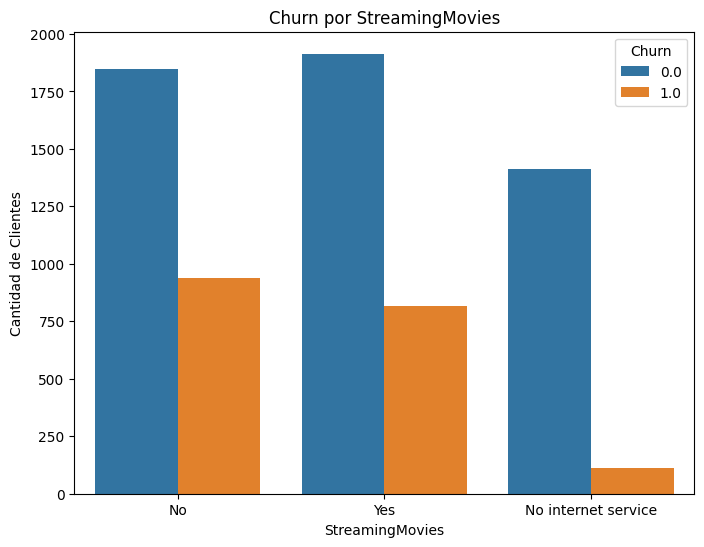

In [10]:
# Análisis Exploratorio
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df_clean.describe(include='all'))

# Proporción de churn
churn_rate = df_clean['Churn'].mean()
print(f"\nTasa de churn: {churn_rate:.2%}")

# Visualización 1: Distribución de tenure por Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title('Distribución de Tenure por Churn')
plt.xlabel('Meses de contrato (tenure)')
plt.ylabel('Frecuencia')
plt.show()

# Visualización 2: Churn por tipo de contrato
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='Contract', hue='Churn')
plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Clientes')
plt.show()

# Visualización 3: Churn por cargos mensuales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Churn', y='Charges.Monthly')
plt.title('Cargos Mensuales por Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Cargos Mensuales')
plt.show()

# Correlación entre variables numéricas
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['tenure', 'Charges.Monthly', 'Charges.Total', 'Churn']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Análisis de servicios adicionales
services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies']
for service in services:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_clean, x=service, hue='Churn')
    plt.title(f'Churn por {service}')
    plt.xlabel(service)
    plt.ylabel('Cantidad de Clientes')
    plt.show()

## 📄Informe final

Resumen

TelecomX enfrenta un problema de alta evasión de clientes, con una tasa de churn del 26.54%. Para identificar las causas, se realizó un proceso de ETL (Extracción, Transformación, Carga) y un análisis exploratorio de datos utilizando Python, Pandas y Matplotlib en Google Colab. Los datos, que incluyen información de 7,267 clientes, abarcan variables demográficas, servicios contratados, y detalles de facturación. A continuación, se presentan los hallazgos clave y recomendaciones para reducir el churn.

Hallazgos Clave

- Tasa de Churn  
La tasa de churn es del 26.54%, lo que significa que aproximadamente 1 de cada 4 clientes abandona la empresa.

- Duración del Contrato (tenure)  
La distribución de tenure por churn muestra que los clientes con menor tiempo de contrato (tenure < 10 meses) tienen una mayor probabilidad de abandonar. El histograma indica que la mayoría de los clientes que abandonan lo hacen en los primeros 10 meses, mientras que los clientes con tenure superior a 50 meses tienen una probabilidad mucho menor de churn. El tenure promedio es de 32.35 meses, pero los clientes que abandonan tienden a tener un tenure mucho más bajo.

- Tipo de Contrato (Contract)  
Los clientes con contratos "Month-to-month" (4,005 de los 7,267 clientes) tienen una tasa de churn significativamente mayor que aquellos con contratos de "One year" o "Two year". El gráfico de churn por tipo de contrato muestra que aproximadamente el 40% de los clientes con contratos mensuales abandonan, frente a menos del 10% para contratos de uno o dos años. Esto sugiere que la flexibilidad de los contratos a corto plazo facilita la salida de los clientes.

- Cargos Mensuales (Charges.Monthly)  
Los clientes que abandonan tienen cargos mensuales más altos. El boxplot de "Cargos Mensuales por Churn" muestra que la mediana de Charges.Monthly para los clientes que abandonan (Churn=1) es de aproximadamente $80, mientras que para los que permanecen (Churn=0) es de alrededor de $60. Además, el 75% de los clientes que abandonan tienen cargos mensuales superiores a $70, frente a un promedio general de $64.72. Esto indica una posible sensibilidad al precio o insatisfacción con el valor percibido.

- Servicios Adicionales  
 - La falta de servicios adicionales está asociada con un mayor churn:  
   - OnlineSecurity: Los clientes sin OnlineSecurity (aproximadamente 2,000 clientes) tienen una tasa de churn más alta (cerca del 40%) en comparación con aquellos que sí lo tienen (menos del 20%).  

   - OnlineBackup: Similarmente, los clientes sin OnlineBackup (3,182 clientes) tienen una mayor probabilidad de churn (alrededor del 35%) frente a los que sí lo tienen (menos del 15%).  

   - DeviceProtection: Los clientes sin DeviceProtection (3,195 clientes) presentan un churn del 35%, mientras que aquellos con el servicio tienen un churn inferior al 20%.  

   - Tech Support: La ausencia de TechSupport (3,582 clientes) está asociada con un churn del 40%, mientras que los clientes con soporte técnico tienen un churn inferior al 15%.  

   - StreamingTV y StreamingMovies: Aunque el impacto es menos pronunciado, los clientes sin estos servicios (2,896 y 2,870 clientes, respectivamente) también tienen un churn ligeramente mayor (alrededor del 30%) frente a los que sí los tienen (20%).

 - En general, los clientes sin servicio de internet ("No internet service") tienen el menor churn (menos del 10%), lo que sugiere que los clientes con planes básicos de telefonía son más leales.


- Análisis de Correlaciones  

 - La matriz de correlación muestra las siguientes relaciones:  
    - tenure tiene una correlación negativa moderada con Churn (-0.35), lo que confirma que a mayor tiempo de contrato, menor probabilidad de abandono.  

    - Charges.Monthly tiene una correlación positiva leve con Churn (0.19), indicando que cargos mensuales más altos están asociados con un mayor churn.  

    - Charges.Total tiene una correlación negativa débil con Churn (-0.20), lo que podría deberse a que los clientes con mayor tenure (y por ende mayores Charges.Total) tienden a permanecer más tiempo.  

    - tenure y Charges.Total tienen una correlación positiva fuerte (0.83), lo cual es esperado, ya que los cargos totales aumentan con el tiempo de contrato.


Recomendaciones

Basado en los hallazgos, se proponen las siguientes estrategias para reducir el churn:  

 - Fomentar Contratos a Largo Plazo  
  - Ofrecer incentivos para contratos de uno o dos años, como descuentos en los primeros meses o servicios adicionales gratuitos. Esto podría reducir el churn, ya que los contratos "Month-to-month" tienen una tasa de abandono mucho mayor.

 - Optimizar los Cargos Mensuales  
Revisar los planes con cargos mensuales altos (especialmente aquellos por encima de $70) y ofrecer alternativas más accesibles. Por ejemplo, crear paquetes que combinen servicios adicionales a un precio competitivo para mejorar la percepción de valor.

 - Promover Servicios Adicionales  
Incentivar la adopción de OnlineSecurity, TechSupport, OnlineBackup, y DeviceProtection, ya que estos servicios están asociados con un menor churn. Por ejemplo, ofrecer descuentos en el primer año o incluirlos gratis en planes premium.

 - Mejorar la Experiencia de Clientes Nuevos  
Dado que los clientes con tenure menor a 10 meses tienen un alto churn, implementar programas de bienvenida, como soporte técnico gratuito durante los primeros meses o encuestas de satisfacción para identificar y resolver problemas tempranos.

 - Fidelizar a Clientes con Planes Básicos  
Los clientes sin servicio de internet tienen el menor churn. TelecomX podría ofrecer promociones para mantener a estos clientes satisfechos, como descuentos en servicios de telefonía o beneficios por lealtad.


Conclusión

El alto índice de churn en TelecomX (26.54%) está impulsado principalmente por contratos a corto plazo ("Month-to-month"), cargos mensuales elevados, y la falta de adopción de servicios adicionales como OnlineSecurity, TechSupport, y DeviceProtection. Los clientes nuevos (tenure < 10 meses) son especialmente propensos a abandonar, lo que sugiere problemas de satisfacción inicial. Al implementar las recomendaciones propuestas, TelecomX puede mejorar la retención de clientes y reducir el churn a niveles más aceptables (idealmente por debajo del 20%).